<a href="https://colab.research.google.com/github/jovian-explorer/Short-Projects/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AA 609 : Computational Methods for Astronomy and Space Sciences



```
Name : Keshav Aggarwal
Roll No. : 2103121014
```



This assignment is an extension of what was demonstrated in the tutorial class.

Perform the following steps:

(a) Generate a 3D grid of size 64 × 64 × 64.

(b) Generate a Gaussian random field in this grid with its peak at the centre of the grid.

(c) Plot this field in 3D and with 2D slices.

(d) Generate a sphere (with its centre at the centre of the grid) on a grid of size $64^3$.Starting with a radius of 1 grid unit. Make all cells inside the sphere to have value 1 and all outside should have a value 0.

(e) Fourier transform (FT) both the grids containing the Gaussian random field and the sphere.

(f) Multiply these two Fourier transformed grids.

(g) Back FT the product grid and plot it.

(h) Vary the radius of the smoothing sphere from 1 grid unit to half of the grid size i.e. 32 for a grid of $64^3$.

(i) Plot the field for these various smoothing scales.

(j) Plot the mean and variance of the smoothed field as a function of smoothing radii.

(k) Did you do everything correctly so far? Is there any need for normalization anywhere?

(l) What implicit assumption regarding the field has to be satisfied for this smoothing operation through convolution to work?

In [ ]:
#Required libarries
import numpy as np
import matplotlib.pyplot as plt

#####(a) Generate a 3D grid of size 64 × 64 × 64.

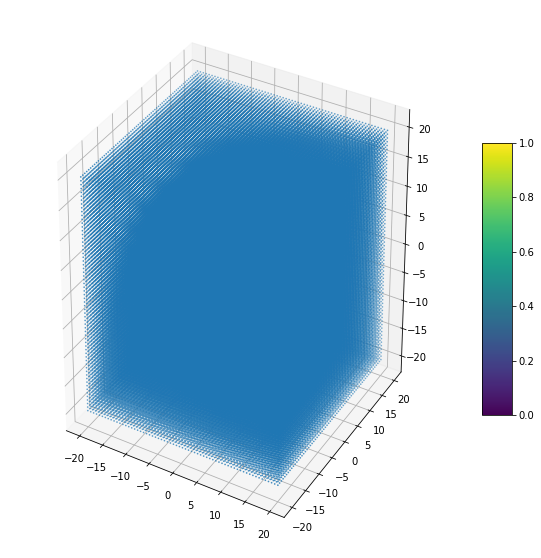

In [ ]:
# Creating a 3D uniform grid
size = 64
x, y ,z = np.meshgrid(np.linspace(-20,20,size), np.linspace(-20,20,size), np.linspace(-20,20,size))
distance = np.sqrt(x*x+y*y+ z*z)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
surf1 = ax.scatter3D(x,y,z,s=0.5)
fig.colorbar(surf1, shrink=0.5, aspect=9)

#####(b) Generate a Gaussian random field in this grid with its peak at the centre of the grid.

In [ ]:
sigma = 9
mu = 0.0

# 3D gaussian Funcyion
gauss = np.exp((-(distance - mu)**2) / (2*sigma**2))

mean = np.mean(gauss)
variance = np.var(gauss)

print('\033[96m' + "Shape of Gaussian array : ", gauss.shape) 
print('\033[96m' + "Mean of gauss = ", np.round(mean,2))
print('\033[96m' + "Variance of gauss = ", np.round(variance,2))

Shape of Gaussian array :  (64, 64, 64)
Mean of gauss =  0.16
Variance of gauss =  0.03


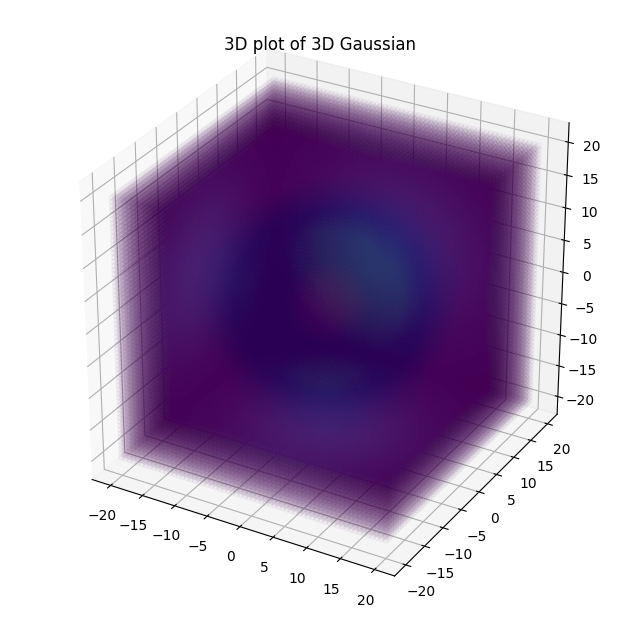

In [ ]:
#3D plot of gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=gauss, alpha = 0.03)
plt.title('3D plot of 3D Gaussian')
plt.show()

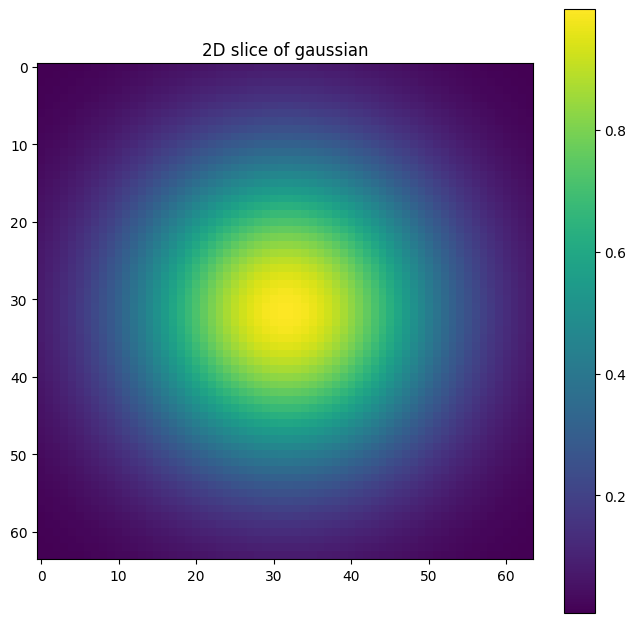

In [ ]:
#2D slice of same gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(gauss[:,:,32])
plt.title('2D slice of gaussian')
plt.colorbar()
plt.show()

#####(c) Plot this field in 3D and with 2D slices.

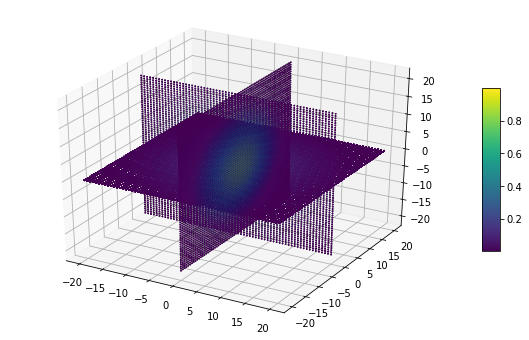

In [ ]:
#3D Plot of the gaussian surface  with 2D slices
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(x,y,gauss,s=0.5,c = gauss)
ax.scatter3D(gauss,y,z,s=0.5,c = gauss, alpha = 0.03)
ax.scatter3D(x,gauss,z,s=0.5,c = gauss, alpha = 0.03)
fig.colorbar(surf, shrink=0.5, aspect=9)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('Gaussian')
# ax.set_title('Surface plot of Gaussian')
plt.show()

#####(d) Generate a sphere (with its centre at the centre of the grid) on a grid of size  $64^3$ .Starting with a radius of 1 grid unit. Make all cells inside the sphere to have value 1 and all outside should have a value 0.

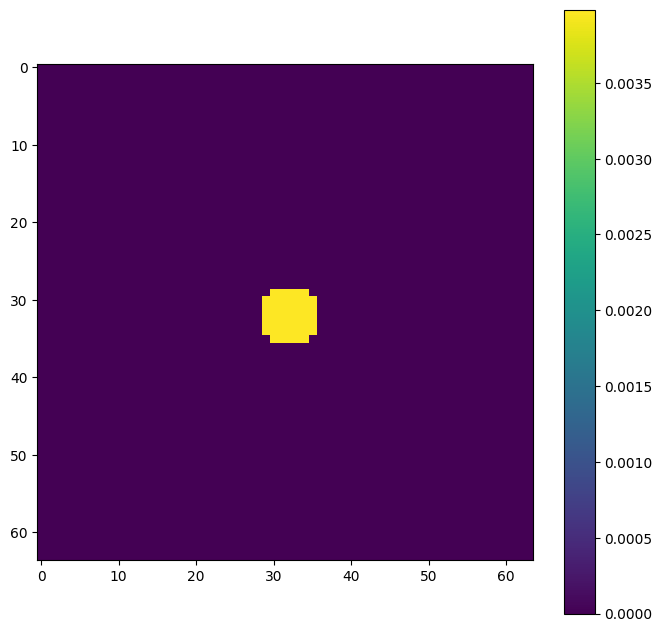

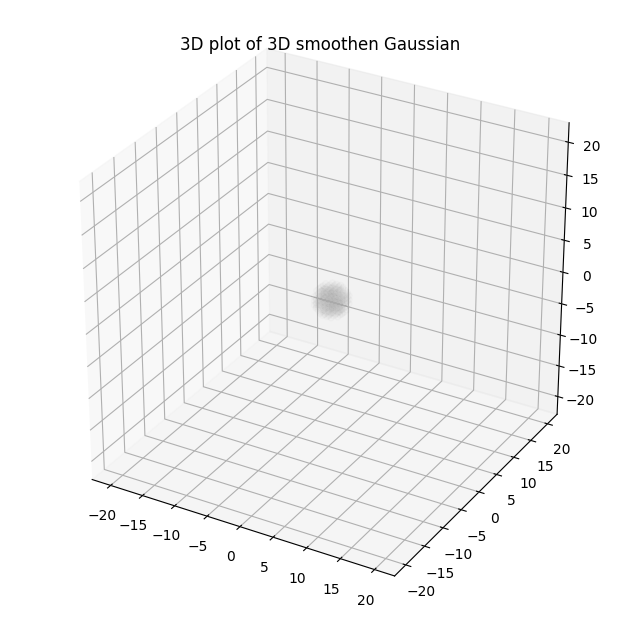

In [ ]:
# Creating Mask to smooth

def sphere(size_of_grid, radius):
    mask = np.zeros((size_of_grid,size_of_grid,size_of_grid))
    N = 0
    # creating spherical mask
    for i in range(size_of_grid):
        for j in range(size_of_grid):
            for k in range(size_of_grid):
                if (i-int(size_of_grid/2))**2 + (j-int(size_of_grid/2))**2 + (k-int(size_of_grid/2))**2 < radius**2:
                    mask[i][j][k] = 1
                    N+=1
                else:
                    mask[i][j][k] = 0
    # Normalising mask
    mask = mask / N
    return mask

# mask with radius 4 pixel
mask = sphere(64, 4)
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(mask[:,:,32])
plt.colorbar()
plt.show()

#3D plot of gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=mask, alpha = 0.01, cmap='Greys')
plt.title('3D plot of 3D smoothen Gaussian')
plt.show()

#####(e) Fourier transform (FT) both the grids containing the Gaussian random field and the sphere.

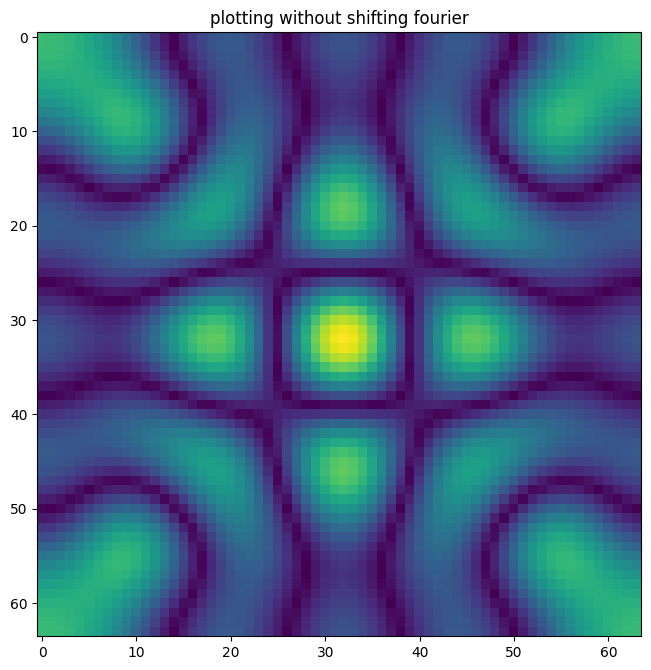

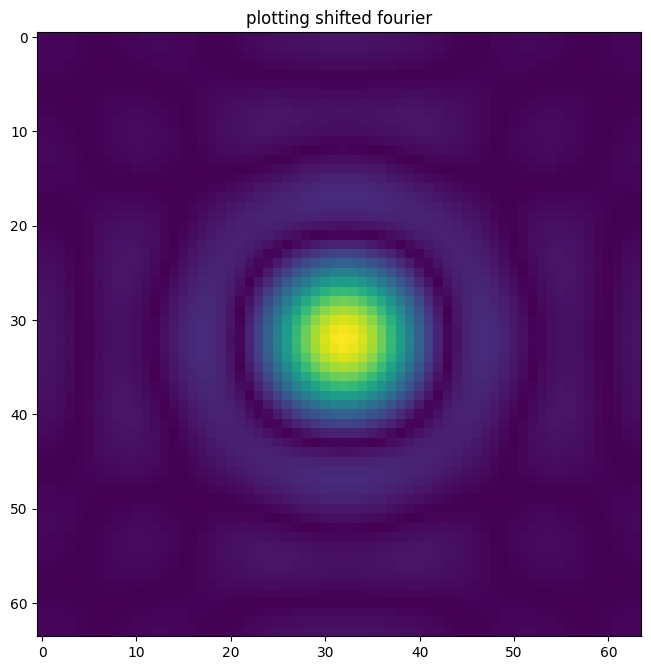

In [ ]:
#Fast fourier transform of given mask
FT_grid = np.fft.fftn(mask)
FTshift_grid = np.fft.fftshift(FT_grid)

#plotting without shifted fourier 
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(abs(FT_grid[:,:,32]))
plt.title('plotting without shifting fourier')
plt.show()

#plotting shifted fourier 
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(abs(FTshift_grid[:,:,32]))
plt.title('plotting shifted fourier')
plt.show()

In [ ]:
FT = np.fft.fftn(gauss)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:4211: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


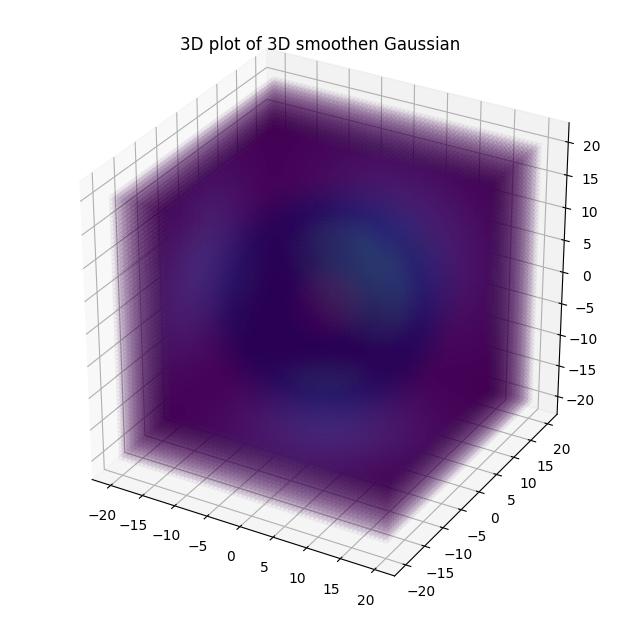

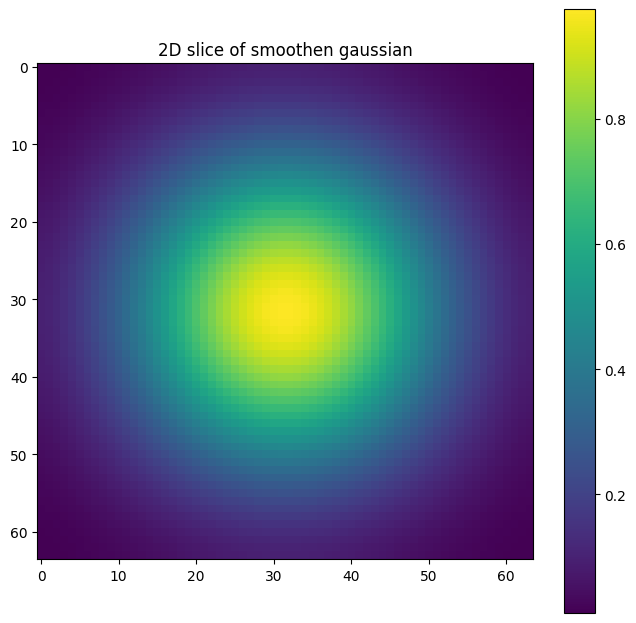

In [ ]:
#Convolving Given gasussian with mask
conv = FT_grid * FT

#Taking Inverse Fourier tranform
inverse_fft_of_conv = np.fft.ifftn(conv)
shifted_fft = np.fft.fftshift(inverse_fft_of_conv)

#3D plot of gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=shifted_fft, alpha = 0.03)
plt.title('3D plot of 3D smoothen Gaussian')
plt.show()

#2D slice of same gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(abs(shifted_fft[:,:,32]))
plt.title('2D slice of smoothen gaussian')
plt.colorbar()
plt.show()

#####(g) Back FT the product grid and plot it.

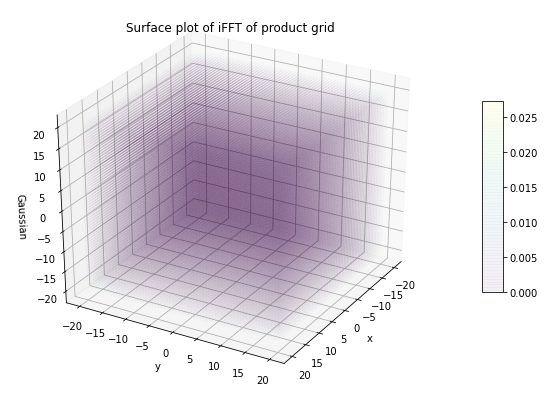

In [ ]:
# Product of the fft gaussian and fft square mask
product_grid = shifted_fft * FTshift_grid

# Inverse fft of the product grid
ifftransform1 = np.fft.ifft2(product_grid)
ifftransform2 = np.fft.ifftshift(ifftransform1)
ifftransform_plot = abs(ifftransform2)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
surf11 = ax.scatter3D(x, y, z,s=0.5,c = ifftransform_plot, alpha = 0.03)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Gaussian')

ax.set_title('Surface plot of iFFT of product grid')

fig.colorbar(surf11, shrink=0.5, aspect=9)
ax.view_init(30, 30)

#####(f) Multiply these two Fourier transformed grids.



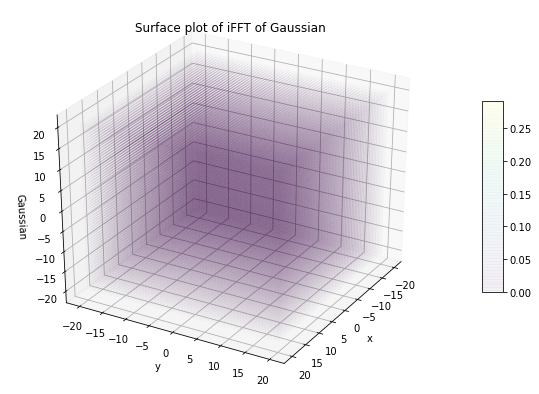

In [ ]:
# Inverse Fast Fourier Transform of original gaussian
ifftransform1 = np.fft.ifft2(shifted_fft)
ifftransform2 = np.fft.ifftshift(ifftransform1)
ifftransform_plot = abs(ifftransform2)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
surf12 = ax.scatter3D(x, y,z,s=0.5,c = ifftransform_plot, alpha = 0.03)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Gaussian')

ax.set_title('Surface plot of iFFT of Gaussian')

fig.colorbar(surf12, shrink=0.5, aspect=9)
ax.view_init(30, 30)

#####(h) Vary the radius of the smoothing sphere from 1 grid unit to half of the grid size i.e. 32 for a grid of  $64^3$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


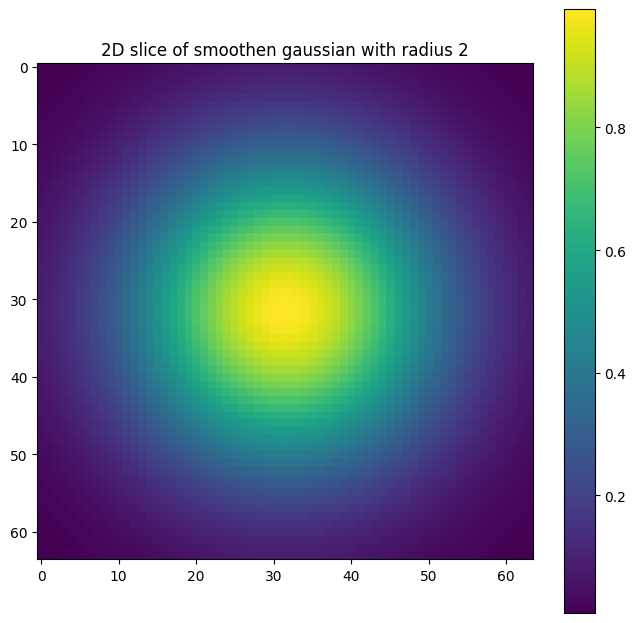

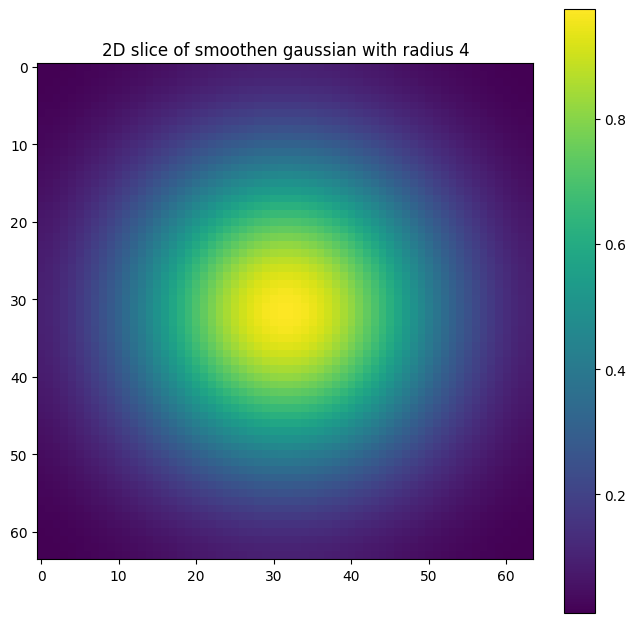

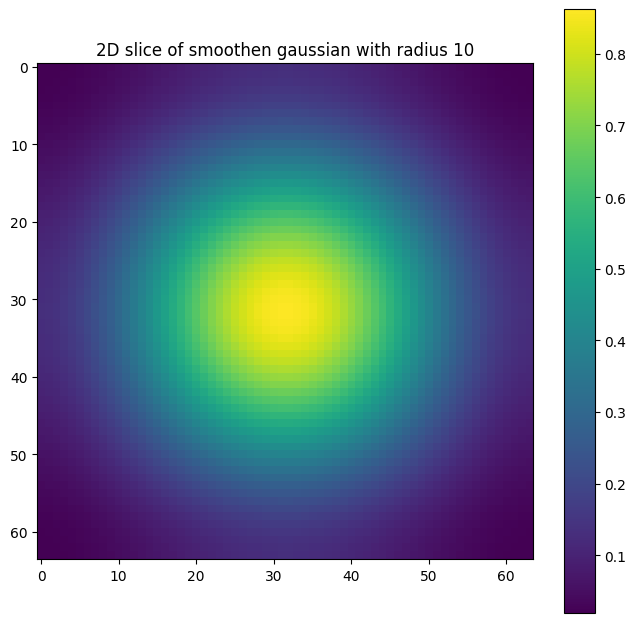

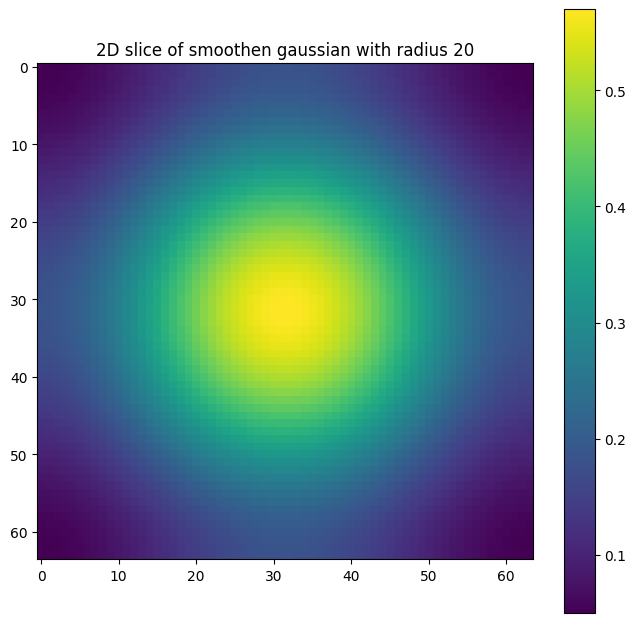

In [ ]:
# Creqating loop to calculate mean and variance
mean_gauss = np.zeros(32)
var_gauss = np.zeros(32)

for i in range(32):
    mask_ = sphere(64, i)
    FT_grid_ = np.fft.fftn(mask_)
    conv_ = FT_grid_ * FT
    inverse_fft_of_conv_ = np.fft.ifftn(conv_)
    shifted_fft_ = np.fft.fftshift(inverse_fft_of_conv_)

    mean_gauss[i] = np.mean(inverse_fft_of_conv_)
    var_gauss[i] = np.var(inverse_fft_of_conv_)

    if i == 2 or i == 4 or i==10 or i ==20 or i == 32:
        fig = plt.figure(figsize=(8,8),dpi=100)
        plt.imshow(abs(shifted_fft_[:,:,32]))
        plt.title(f'2D slice of smoothen gaussian with radius {i}')
        plt.colorbar()
        plt.show()

#####(i) Plot the field for these various smoothing scales.

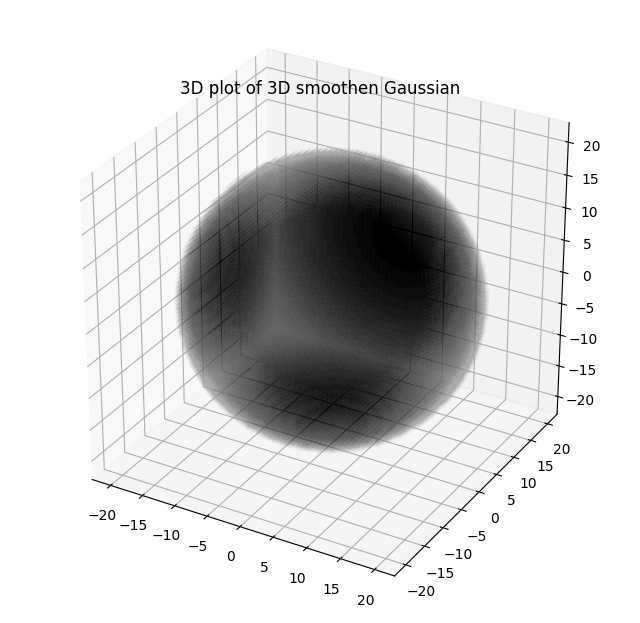

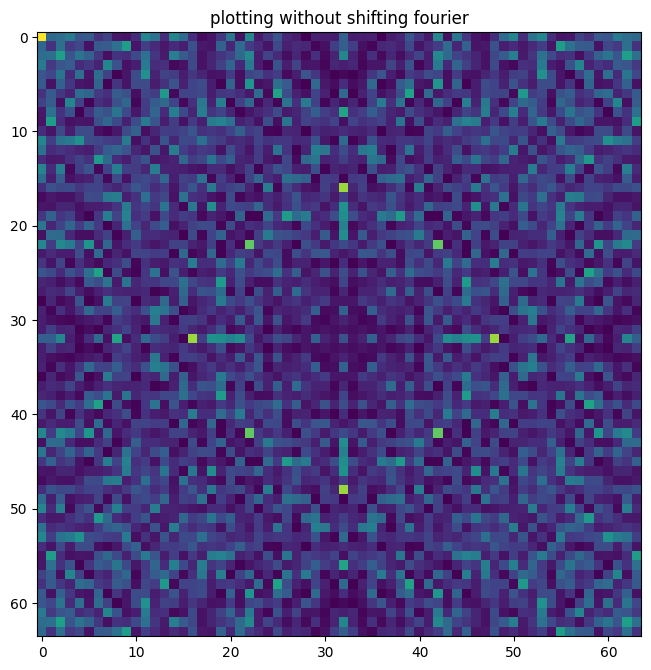

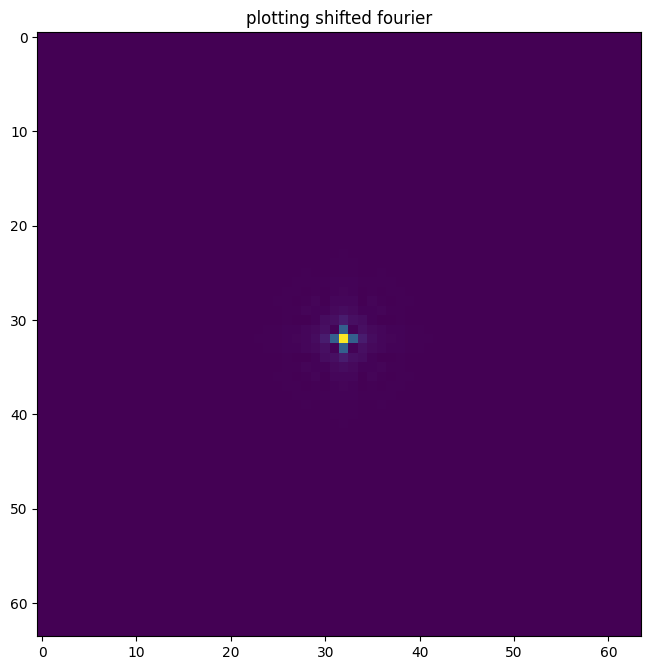

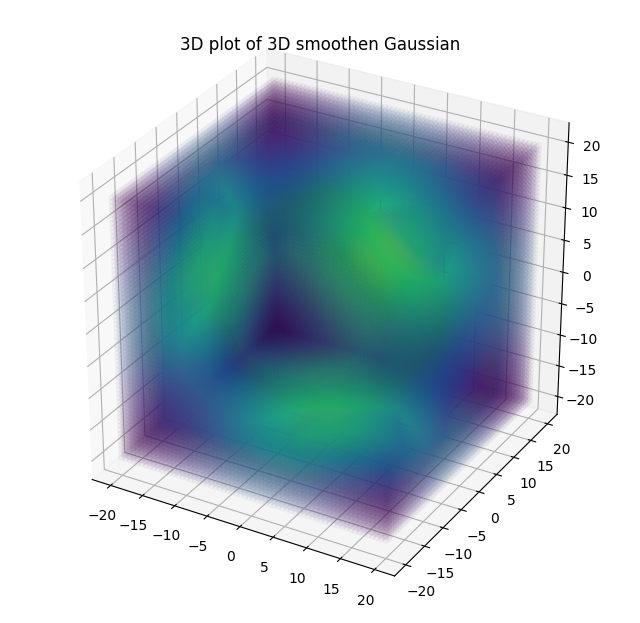

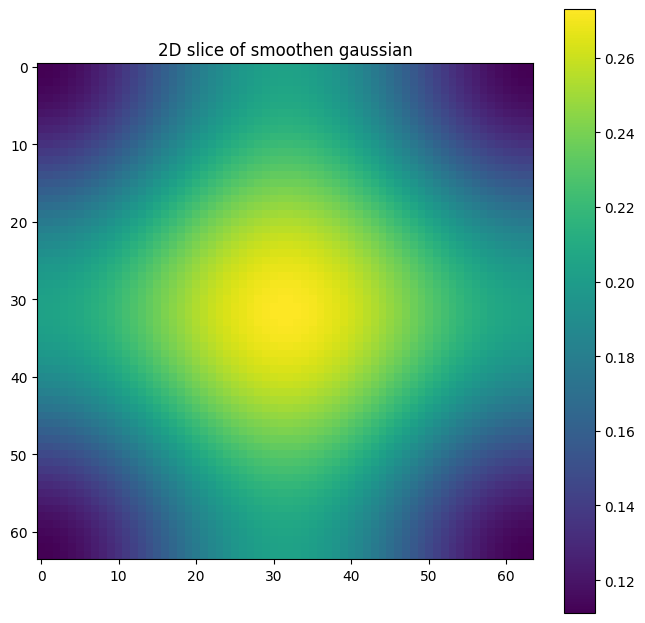

In [ ]:
# mask with radius 32 pixel

mask2 = sphere(64, 32)
FT_grid2 = np.fft.fftn(mask2)
FTshift_grid2 = np.fft.fftshift(FT_grid2)

#3D plot of gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=mask2, alpha = 0.01, cmap='Greys')
plt.title('mask with radius 32')
plt.title('3D plot of 3D smoothen Gaussian')
plt.show()

#plotting without shifted fourier 
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(abs(FT_grid2[:,:,32]))
plt.title('plotting without shifting fourier')
plt.show()

#plotting shifted fourier 
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(abs(FTshift_grid2[:,:,32]))
plt.title('plotting shifted fourier')
plt.show()

#Convolving Given gasussian with mask
conv2 = FT_grid2 * FT

#Taking Inverse Fourier tranform
inverse_fft_of_conv2 = np.fft.ifftn(conv2)
shifted_fft2 = np.fft.fftshift(inverse_fft_of_conv2)

#3D plot of gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=abs(shifted_fft2), alpha = 0.03)
plt.title('3D plot of 3D smoothen Gaussian')
plt.show()

#2D slice of same gaussian
fig = plt.figure(figsize=(8,8),dpi=100)
plt.imshow(abs(shifted_fft2[:,:,32]))
plt.title('2D slice of smoothen gaussian')
plt.colorbar()
plt.show()

#####(j) Plot the mean and variance of the smoothed field as a function of smoothing radii.

In [ ]:
# Stats of the new product grid
new_mean = np.mean(ifftransform_plot)
print('\033[96m' + "Mean of new product grid = ", np.round(new_mean,2))

new_variance = np.var(ifftransform_plot)
print('\033[96m' +"Variance of new product grid = ", np.round(new_variance,2))

Mean of new product grid =  0.0
Variance of new product grid =  0.0


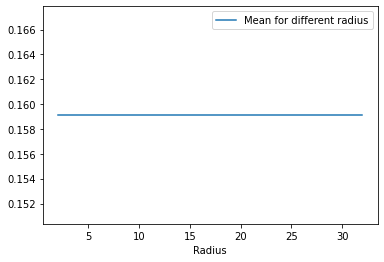

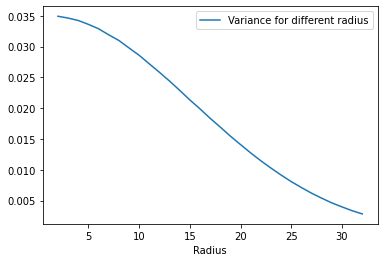

In [ ]:
plt.plot(np.arange(1,33,1), mean_gauss, label = 'Mean for different radius')
plt.xlabel('Radius')
plt.legend()
plt.show()
plt.plot(np.arange(1,33,1), var_gauss, label = 'Variance for different radius')
plt.legend()
plt.xlabel('Radius')
plt.show()